In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from d3s.networks import tgraph, graph
from Code.time_evolving_functions import evolving_ladder, evolving_eigs

In [2]:
np.random.seed(3)

## Simple evolving ladder

In [3]:
# snapshots to get adjacency matrix at
times = np.arange(10)
# edges with weight epsilon
edges = [(0, 4), (4, 0), (1, 5), (5, 1), (2, 6), (6, 2), (3, 7), (7, 3)]
# get snapshots
As, eps = evolving_ladder(2, 4, times, edges)

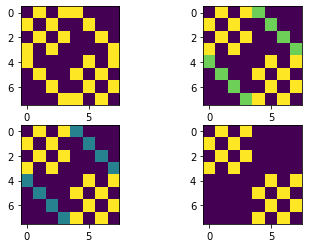

In [4]:
# plot the adjacency matrices at certain time points
fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0,0].imshow(As[:,:,0])
axs[0,1].imshow(As[:,:,2])
axs[1,0].imshow(As[:,:,5])
axs[1,1].imshow(As[:,:,9])

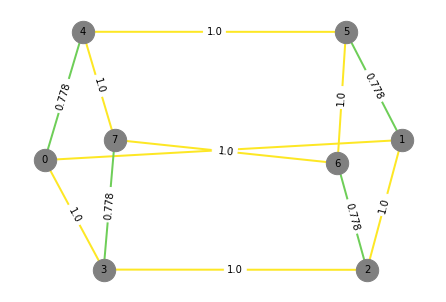

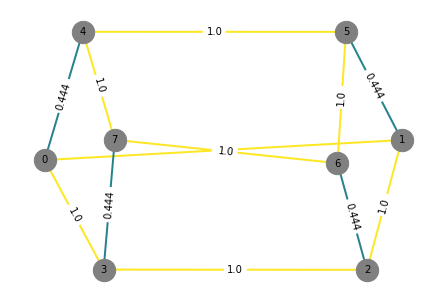

In [14]:
# show graph at start and end
g1 = graph(As[:,:,0])
g2 = graph(As[:,:,2])
g3 = graph(As[:,:,5])
g4 = graph(As[:,:,-1])

g2.draw(weight_colors=True)
plt.show()
g3.draw(weight_colors=True)
plt.show()

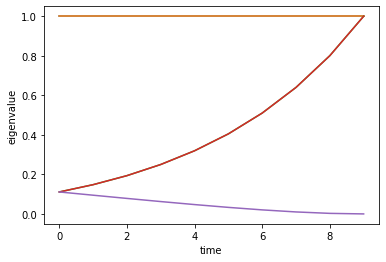

In [15]:
# plot eigenvalues over time
eigs = evolving_eigs(As, evs=5, which="LM")

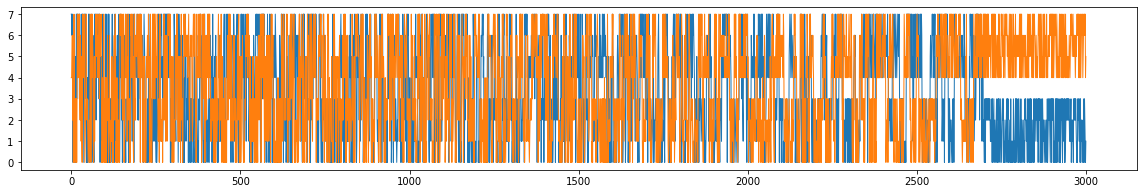

In [26]:
# random walk as graph is evolving
tg = tgraph(As)
# initial condition
x0 = np.random.randint(tg.n)
twalk0 = tg.randomWalk(x0, s=300)
x1 = np.random.randint(tg.n)
twalk1 = tg.randomWalk(x1, s=300)

fig, ax = plt.subplots(figsize=(20,3))
ax.plot(twalk1, linewidth=1)
ax.plot(twalk0, linewidth=1)

In [27]:
# make one snapshot into static graph
i=3
A = As[:,:,i]

g = graph(A)

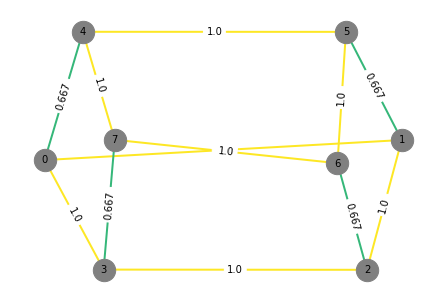

In [28]:
g.draw(weight_colors=True)